# Import Libraries 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Loading (BAGIAN INI GAUSAH DI COPY)

In [2]:
pd.set_option('display.max_rows', 100)

In [ ]:
df = pd.read_json('data.json')
df

,name,force,level,mechanic,equipment,primaryMuscles,secondaryMuscles,instructions,category,images,id
0,3/4 Sit-Up,pull,beginner,compound,body only,[abdominals],[],[Lie down on the floor and secure your feet. Y...,strength,"[3_4_Sit-Up/0.jpg, 3_4_Sit-Up/1.jpg]",3_4_Sit-Up
1,90/90 Hamstring,push,beginner,None,body only,[hamstrings],[calves],"[Lie on your back, with one leg extended strai...",stretching,"[90_90_Hamstring/0.jpg, 90_90_Hamstring/1.jpg]",90_90_Hamstring
2,Ab Crunch Machine,pull,intermediate,isolation,machine,[abdominals],[],[Select a light resistance and sit down on the...,strength,"[Ab_Crunch_Machine/0.jpg, Ab_Crunch_Machine/1....",Ab_Crunch_Machine
3,Ab Roller,pull,intermediate,compound,other,[abdominals],[shoulders],[Hold the Ab Roller with both hands and kneel ...,strength,"[Ab_Roller/0.jpg, Ab_Roller/1.jpg]",Ab_Roller
4,Adductor,static,intermediate,isolation,foam roll,[adductors],[],"[Lie face down with one leg on a foam roll., R...",stretching,"[Adductor/0.jpg, Adductor/1.jpg]",Adductor
...,...,...,...,...,...,...,...,...,...,...,...
868,Wrist Rotations with Straight Bar,pull,beginner,isolation,barbell,[forearms],[],[Hold a barbell with both hands and your palms...,strength,"[Wrist_Rotations_with_Straight_Bar/0.jpg, Wris...",Wrist_Rotations_with_Straight_Bar
869,Yoke Walk,None,intermediate,compound,other,[quadriceps],"[abdominals, abductors, adductors, calves, glu...",[The yoke is usually done with a yoke apparatu...,strongman,"[Yoke_Walk/0.jpg, Yoke_Walk/1.jpg]",Yoke_Walk
870,Zercher Squats,push,expert,compound,barbell,[quadriceps],"[calves, glutes, hamstrings]",[This exercise is best performed inside a squa...,strength,"[Zercher_Squats/0.jpg, Zercher_Squats/1.jpg]",Zercher_Squats
871,Zottman Curl,pull,intermediate,isolation,dumbbell,[biceps],[forearms],[Stand up with your torso upright and a dumbbe...,strength,"[Zottman_Curl/0.jpg, Zottman_Curl/1.jpg]",Zottman_Curl


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              873 non-null    object
 1   force             844 non-null    object
 2   level             873 non-null    object
 3   mechanic          786 non-null    object
 4   equipment         796 non-null    object
 5   primaryMuscles    873 non-null    object
 6   secondaryMuscles  873 non-null    object
 7   instructions      873 non-null    object
 8   category          873 non-null    object
 9   images            873 non-null    object
 10  id                873 non-null    object
dtypes: object(11)
memory usage: 75.2+ KB


In [5]:
# Identify rows with missing values
missing_rows = df[df['force'].isnull()]

# Display rows with missing values
missing_rows['name']

33                      Balance Board
35              Band Assisted Pull-Up
87                          Bicycling
88              Bicycling, Stationary
143                Carioca Quick Step
179                     Conan's Wheel
259                Elliptical Trainer
267                     Farmer's Walk
334                          Inchworm
345         Incline Inner Biceps Curl
354       Internal Rotation with Band
369                Jogging, Treadmill
422    Linear Acceleration Wall Drill
450            Lying Prone Quadriceps
468                Moving Claw Series
560                      Push-Up Wide
577                    Recumbent Bike
597                    Rickshaw Carry
607                      Rope Jumping
610                Rowing, Stationary
612                Running, Treadmill
682             Single Dumbbell Raise
688                           Skating
702       Smith Machine Decline Press
739                       Stairmaster
788                         Step Mill
819         

In [6]:
# Identify rows with missing values
missing_rows = df[df['equipment'].isnull()]

# Display rows with missing values
missing_rows['name']

5                            Adductor/Groin
12             Alternate Leg Diagonal Bound
20                            Ankle Circles
21                        Ankle On The Knee
24                              Arm Circles
95                 Bodyweight Walking Lunge
138        Calf Stretch Elbows Against Wall
139         Calf Stretch Hands Against Wall
143                      Carioca Quick Step
144                             Cat Stretch
149                Chair Lower Back Stretch
158                            Child's Pose
160                   Chin To Chest Stretch
184                 Crossover Reverse Lunge
190                        Dancer's Stretch
202                         Decline Push-Up
250                    Dynamic Back Stretch
251                   Dynamic Chest Stretch
254                           Elbow Circles
256                             Elbows Back
274                   Floor Glute-Ham Raise
282                               Frog Hops
305                  Groin and B

In [7]:
df['equipment'].value_counts()

equipment
barbell          170
dumbbell         123
other            122
body only        111
cable             81
machine           67
kettlebells       53
bands             20
medicine ball     17
exercise ball     12
foam roll         11
e-z curl bar       9
Name: count, dtype: int64

In [8]:
# Identify rows with missing values
missing_rows = df[df['mechanic'].isnull()]

# Display rows with missing values
missing_rows['name']

1                          90/90 Hamstring
5                           Adductor/Groin
8                   All Fours Quad Stretch
21                       Ankle On The Knee
22                   Anterior Tibialis-SMR
87                               Bicycling
88                   Bicycling, Stationary
104                         Brachialis-SMR
140                             Calves-SMR
143                     Carioca Quick Step
144                            Cat Stretch
151               Chair Upper Body Stretch
158                           Child's Pose
160                  Chin To Chest Stretch
184                Crossover Reverse Lunge
190                       Dancer's Stretch
215             Double Kettlebell Windmill
250                   Dynamic Back Stretch
251                  Dynamic Chest Stretch
259                     Elliptical Trainer
278                               Foot-SMR
291                       Front Leg Raises
328                     Hug Knees To Chest
332        

In [9]:
df['mechanic'].value_counts()

mechanic
compound     489
isolation    297
Name: count, dtype: int64

In [10]:
df.isnull().sum()

name                 0
force               29
level                0
mechanic            87
equipment           77
primaryMuscles       0
secondaryMuscles     0
instructions         0
category             0
images               0
id                   0
dtype: int64

In [11]:
columns = df.columns
print(columns)

Index(['name', 'force', 'level', 'mechanic', 'equipment', 'primaryMuscles',
       'secondaryMuscles', 'instructions', 'category', 'images', 'id'],
      dtype='object')


In [12]:
df['force'].value_counts()

force
pull      371
push      369
static    104
Name: count, dtype: int64

# Data Transformation

**List of Transformations**:
1. **Missing values** on column `forces` are replaced with their respective force in accordance to similar exercises according to [MuscleWiki](https://musclewiki.com).
2. **Missing values** on column `equipment` are replaced with their respective equipment in accordance to whether or not they use an equipment according to [MuscleWiki](https://musclewiki.com).
3. **Missing values** on column `mechanic` are filled with unknown.

## INI KODE TRANSFORMASINYA

In [27]:
# Define a function to categorize force
def categorize_force(exercise_name):
    if exercise_name in [
        "Balance Board", "Conan's Wheel", "Farmer's Walk", "Rickshaw Carry", "Lying Prone Quadriceps", "Yoke Walk"
    ]:
        return "static"
    elif exercise_name in [
        "Bicycling", "Bicycling, Stationary", "Elliptical Trainer", "Jogging, Treadmill", "Push-Up Wide",
        "Recumbent Bike", "Rope Jumping", "Running, Treadmill", "Skating", "Smith Machine Decline Press", 
        "Stairmaster", "Step Mill", "Trail Running/Walking", "Walking, Treadmill", "Carioca Quick Step",
        "Inchworm", "Linear Acceleration Wall Drill", "Moving Claw Series"
    ]:
        return "push"
    elif exercise_name in [
        "Band Assisted Pull-Up", "Incline Inner Biceps Curl", "Internal Rotation with Band", "Rowing, Stationary",
        "Single Dumbbell Raise"
    ]:
        return "pull"
    else:
        return "unknown"  # Fallback for unrecognized exercises

# Fill missing values in the 'force' column
df['force'] = df.apply(lambda row: categorize_force(row['name']) if pd.isnull(row['force']) else row['force'], axis=1)

# Define a function to categorize equipment
def categorize_equipment(exercise_name):
    body_only = [
        "Ankle Circles", "Ankle On The Knee", "Arm Circles", "Bodyweight Walking Lunge",
        "Calf Stretch Elbows Against Wall", "Calf Stretch Hands Against Wall", "Cat Stretch",
        "Chair Lower Back Stretch", "Child's Pose", "Chin To Chest Stretch", "Crossover Reverse Lunge",
        "Dancer's Stretch", "Decline Push-Up", "Elbow Circles", "Elbows Back", "Groin and Back Stretch",
        "Hamstring Stretch", "Hug Knees To Chest", "Inverted Row", "Knee Across The Body",
        "Kneeling Arm Drill", "Kneeling Forearm Stretch", "Kneeling Hip Flexor", "Leg-Up Hamstring Stretch",
        "Looking At Ceiling", "Middle Back Stretch", "On Your Side Quad Stretch", "One Arm Against Wall",
        "One Half Locust", "One Knee To Chest", "Overhead Stretch", "Pelvic Tilt Into Bridge",
        "Prone Manual Hamstring", "Runner's Stretch", "Scapular Pull-Up", "Seated Calf Stretch",
        "Seated Floor Hamstring Stretch", "Seated Hamstring", "Seated Overhead Stretch", "Shoulder Circles",
        "Shoulder Raise", "Shoulder Stretch", "Side-Lying Floor Stretch", "Side Lying Groin Stretch",
        "Side Neck Stretch", "Side Wrist Pull", "Spinal Stretch", "Standing Gastrocnemius Calf Stretch",
        "Standing Hip Flexors", "Standing Lateral Stretch", "Standing Soleus And Achilles Stretch",
        "Standing Toe Touches", "The Straddle", "Tricep Side Stretch", "Triceps Stretch",
        "Upper Back-Leg Grab", "Upper Back Stretch", "Upward Stretch", "Windmills"
    ]
    return "body only" if exercise_name in body_only else "other"

# Check for missing values in the 'equipment' column and apply the function only to those rows
df['equipment'] = df['equipment'].apply(lambda x: categorize_equipment(x) if pd.isna(x) else x)

# Fill missing values in the 'mechanic' column
df['mechanic'] = df['mechanic'].fillna('unknown')

# Fill empty lists in the 'secondaryMuscles' column with 'none'
df['secondaryMuscles'] = df['secondaryMuscles'].apply(lambda x: ['none'] if isinstance(x, list) and len(x) == 0 else x)

# Flatten the primaryMuscles column to strings if there's only one muscle in each list
df['primaryMuscles'] = df['primaryMuscles'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

# If 'instructions' contains lists, join them into strings
df['instructions'] = df['instructions'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [14]:
# display
df

,name,force,level,mechanic,equipment,primaryMuscles,secondaryMuscles,instructions,category,images,id
0,3/4 Sit-Up,pull,beginner,compound,body only,abdominals,[none],[Lie down on the floor and secure your feet. Y...,strength,"[3_4_Sit-Up/0.jpg, 3_4_Sit-Up/1.jpg]",3_4_Sit-Up
1,90/90 Hamstring,push,beginner,unknown,body only,hamstrings,[calves],"[Lie on your back, with one leg extended strai...",stretching,"[90_90_Hamstring/0.jpg, 90_90_Hamstring/1.jpg]",90_90_Hamstring
2,Ab Crunch Machine,pull,intermediate,isolation,machine,abdominals,[none],[Select a light resistance and sit down on the...,strength,"[Ab_Crunch_Machine/0.jpg, Ab_Crunch_Machine/1....",Ab_Crunch_Machine
3,Ab Roller,pull,intermediate,compound,other,abdominals,[shoulders],[Hold the Ab Roller with both hands and kneel ...,strength,"[Ab_Roller/0.jpg, Ab_Roller/1.jpg]",Ab_Roller
4,Adductor,static,intermediate,isolation,foam roll,adductors,[none],"[Lie face down with one leg on a foam roll., R...",stretching,"[Adductor/0.jpg, Adductor/1.jpg]",Adductor
...,...,...,...,...,...,...,...,...,...,...,...
868,Wrist Rotations with Straight Bar,pull,beginner,isolation,barbell,forearms,[none],[Hold a barbell with both hands and your palms...,strength,"[Wrist_Rotations_with_Straight_Bar/0.jpg, Wris...",Wrist_Rotations_with_Straight_Bar
869,Yoke Walk,static,intermediate,compound,other,quadriceps,"[abdominals, abductors, adductors, calves, glu...",[The yoke is usually done with a yoke apparatu...,strongman,"[Yoke_Walk/0.jpg, Yoke_Walk/1.jpg]",Yoke_Walk
870,Zercher Squats,push,expert,compound,barbell,quadriceps,"[calves, glutes, hamstrings]",[This exercise is best performed inside a squa...,strength,"[Zercher_Squats/0.jpg, Zercher_Squats/1.jpg]",Zercher_Squats
871,Zottman Curl,pull,intermediate,isolation,dumbbell,biceps,[forearms],[Stand up with your torso upright and a dumbbe...,strength,"[Zottman_Curl/0.jpg, Zottman_Curl/1.jpg]",Zottman_Curl


# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              873 non-null    object
 1   force             873 non-null    object
 2   level             873 non-null    object
 3   mechanic          873 non-null    object
 4   equipment         873 non-null    object
 5   primaryMuscles    873 non-null    object
 6   secondaryMuscles  873 non-null    object
 7   instructions      873 non-null    object
 8   category          873 non-null    object
 9   images            873 non-null    object
 10  id                873 non-null    object
dtypes: object(11)
memory usage: 75.2+ KB


## Distribution of Each Categories

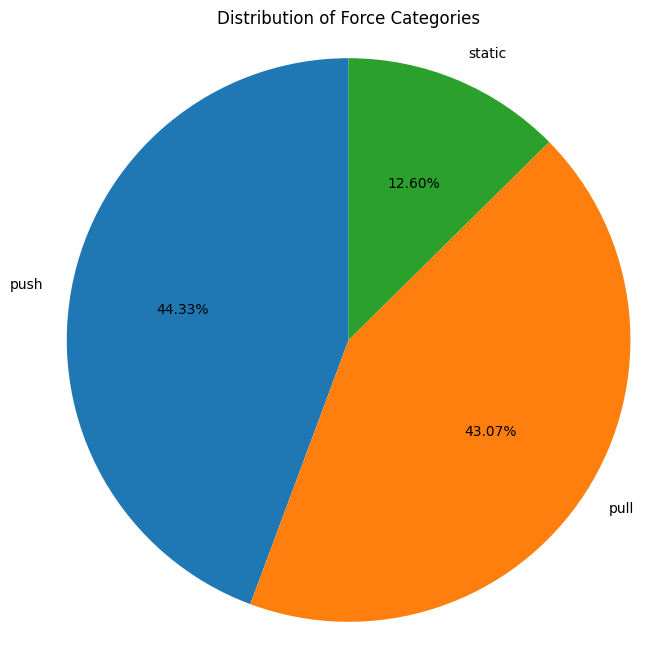

In [16]:
# Count the occurrences of each category in the 'force' column
force_counts = df['force'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(force_counts, labels=force_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Force Categories')
plt.axis('equal')  

# Display the chart
plt.show()

For column `force`

**Overview**
- This column represents the type of force exerted during the exercise, where this dataset divides into three categories of force: **Push, Pull and Static**.

**Background**
- According to [an article done by Aston University Birmingham UK](https://www.aston.ac.uk/sport/news/tips/fitness-exercise/push-pull-legs), **push and pull workouts are the two essential forces used to train all parts of a human body**, where workouts that utilize push forces trains the front side of the body while pull forces trains the back side. These two forces are essential in bodybuilding, and has been a popularized routine since 1987 documented in [a workout book mmade by the legendary bodybuilder Arnold Schwarzenegger](https://search.worldcat.org/title/15244528).
- On the other hand, **static exercises refer to the warm-up routines** that people do before workouts in order to improve joint stability, muscle endurance, and posture improvement, as claimed by [an article made by the American Council on Exercise (ACE)](https://www.acefitness.org/resources/everyone/blog/7258/improve-your-posture-with-these-isometric-exercises/).

**Observation**:
- This dataset has almost an equal amount of exercises that exert push forces and pull forces which amount in more or less 44% of the whole dataset each.
- Static exercises, on the other hand, are less-represented with only 12.6% from the dataset alone.

**Insights**:
- This distribution means that the dataset clearly represents a fair balance between pull and push exercises, offering users a wide range of exercises for training opposing muscle groups. This gives the chatbot better fairness in developing workout plans that trains the two essential forces to train all parts of human body.
- Whilst static exercises have much lower representation compared to the other two, as [the article by American Heart Association suggests](https://www.heart.org/en/healthy-living/fitness/fitness-basics/warm-up-cool-down#:~:text=Warm%20up%20for%205%20to,Use%20your%20entire%20body.), these exercises only take 5 - 10 minutes each session. Since these exercises only take a minor portion of the whole workout, not much data is needed in comparison to the other two.
- In conclusion, the data has enough well-rounded sets of information for the chatbot to recommend users.

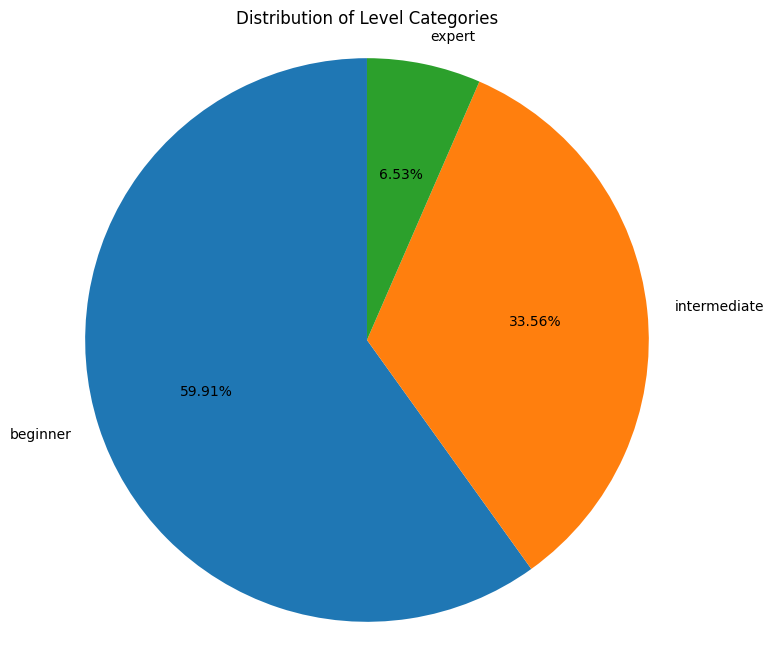

In [17]:
# Count the occurrences of each category in the 'level' column
level_counts = df['level'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Level Categories')
plt.axis('equal')  

# Display the chart
plt.show()

For column `level`

**Overview**
- This column represents the difficulty level of each exercise, where this dataset into three levels of difficulty: **Beginner, Intermediate and Expert**.

**Background**:
- It is no secret that **progressive overload is the key to achieving better fitness results**. [A research done by the Front Physiol in 2019](https://journals.lww.com/acsm-msse/fulltext/2009/03000/progression_models_in_resistance_training_for.26.aspx) suggests that this progression allows for constant stimulation in the muscle as the muscles are already used to the easier repertoire. One way to increase progression is by increase the technical difficulty of exercises, as the research suggests.

**Observation**:
- The majority of exercises in the dataset (59.91%) are categorized as suitable for beginners, indicating a strong emphasis on accessibility for individuals new to fitness.
- Another significant portion (33.56%) is aimed at intermediate users, suggesting the dataset also caters to individuals with moderate experience looking to progress in their fitness journey.
- Only a small portion (6.53%) of the exercises are categorized for experts, reflecting a smaller focus on advanced-level workouts.

**Insights**:
- This observation implies that the dataset prioritizes inclusivity for the general population over specialized training.
- Since the chatbot is designed mostly for the general population, the majority being beginner exercises yet still having a progression to intermediate and expert means it fits the chatbot's objective.

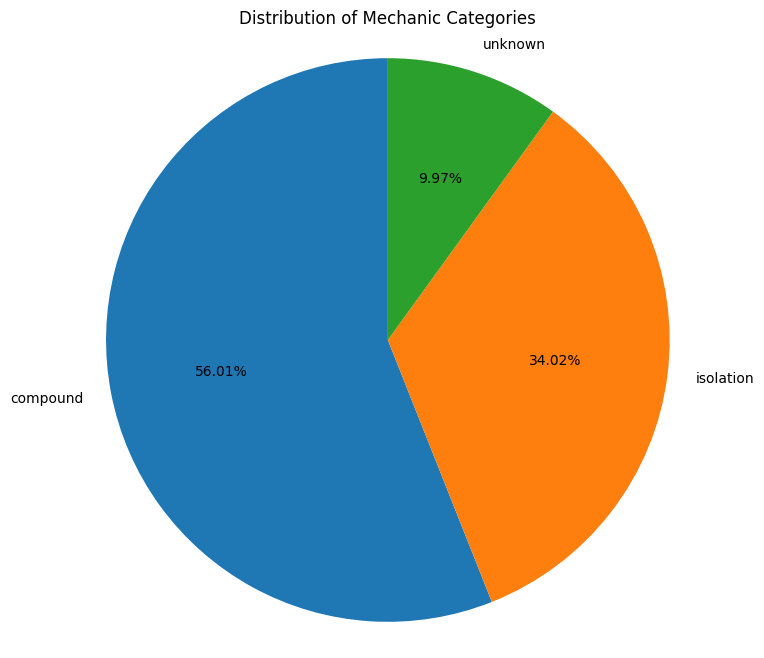

In [18]:
# Count the occurrences of each category in the 'mechanic' column
mechanic_counts = df['mechanic'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(mechanic_counts, labels=mechanic_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Mechanic Categories')
plt.axis('equal')  

# Display the chart
plt.show()

For column `mechanic`

**Overview**
- This column represents how the exercises engage with their respective muscle groups, divided into two: compound exercises (exercises that target multiple muscle groups) and isolation exercises(exercises that target a specific muscle group). 

**Observation**:
- The majority of the exercises in this dataset belong in compound exercises with over half the dataset (56.01%). 
- Isolation belongs in the lower half, with 34.02% of the dataset.
- The last 10% of the exercises in this dataset are unknown, meaning that there is no available information on whether or not these exercises train multiple muscle groups or just individual.

**Insights**:
- The majority belonging to compound might be attributed to the fact that most beginner friendly exercises are compound, and experts like [in this gymshark article](https://row.gymshark.com/blog/article/compound-vs-isolation-exercises) suggest that isolation exercises are more risky to do for beginners.

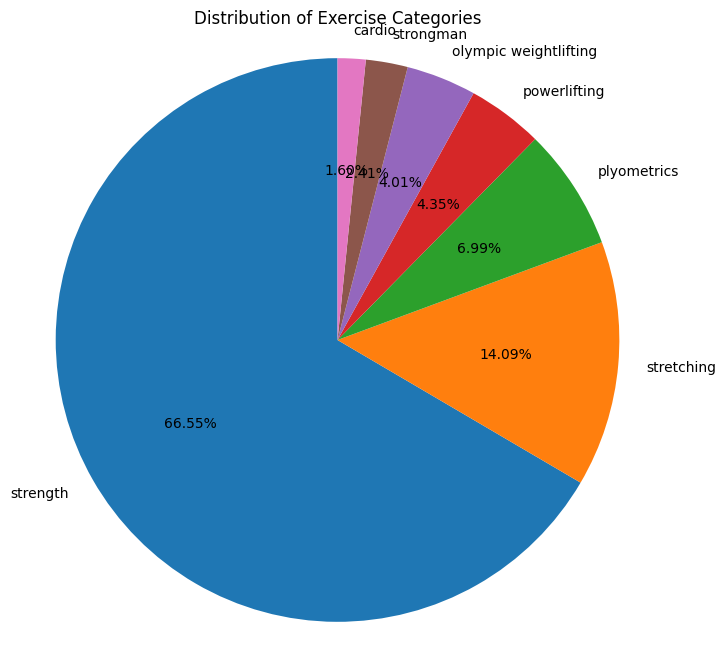

In [19]:
# Count the occurrences of each category in the 'category' column
category_counts = df['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Exercise Categories')
plt.axis('equal')  

# Display the chart
plt.show()

For column `category`

**Overview**
- This column represents the exercise category based on the type of exercise, which consists of six different categories of exercise: strength, stretching, plyometrics, powerlifting, olympic weightlifting, strongman, and cardio.

**Observation**
- In this dataset, strength category exercises remain the distinct majority with as much as 66.55% of the dataset being strength exercises.
- The second majority, although not as distinct of a majority as strength exercises, are stretching, which contains 14.09% of the dataset.
- The smallest portion of exercises here is cardiovascular exercises, accounting for only 1.6% of the dataset.
- The rest of the exercises here are specialized kind of exercises that are tailored more for a specific kind of purpose, such as plyometrics, powerlifting, olympic weightlifting, and strongman.

**Insights**:
- This suggests that the dataset heavily emphasizes strength-based exercises, making it ideal for the general population looking to build muscle, improve strength, or engage in functional fitness.
- Stretching being the substantial proportion of the dataset underlines its significance in warm-up/cool-down routines to ensure that its users do the necessary procedure before starting a workout.
- The other, more specific categories, means that this dataset also accounts for the more difficult kind of exercises that are tailored for users looking to learn competition exercises.

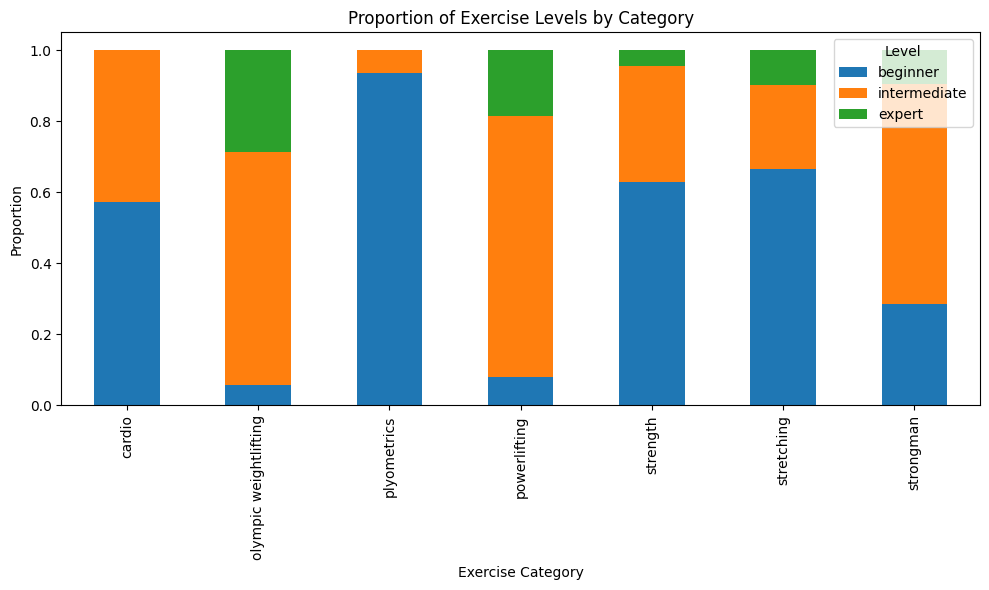

In [20]:
# Ensure 'level' is ordered with "expert" at the top
df['level'] = pd.Categorical(df['level'], categories=['beginner', 'intermediate', 'expert'], ordered=True)

# Calculate the ratio of levels within each category
category_ratio = df.groupby('category')['level'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart with 'expert' at the top
category_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Proportion of Exercise Levels by Category')
plt.xlabel('Exercise Category')
plt.ylabel('Proportion')
plt.legend(title='Level', loc='upper right')
plt.tight_layout()
plt.show()

**Background**:
- Certain exercise categories are bound to be filled with harder exercises than others, especially for the ones that are specialized for the purpose of competition, so displaying information will give us a better understanding on the difficulty distribution of exercises.
- In this case, stacked bar chart is used to display the amount of exercises in certain difficulty levels for each category.

**Observation**:
- From this stacked bar chart, we can see the two categories that represent our dataset, strength and stretching, having roughly the same amount of beginner-intermediate-expert ratio with about 60:30:10 roughly for each of them.
- We can also see on the other hand, [specialized category of exercises that are aimed to train experts for competition](https://www.paralympic.org/powerlifting/about) such as olympic weightlifting, powerfilting, and strongman, the amount of exercises that are intermediate and expert far exceeds the beginner level exercises.
- Polymetrics have the most percentage of beginner level exercises in comparison to others.

**Insights**:
- Categories such as cardio, stretching, and strength exercises are predominantly beginner-friendly. This suggests that these types of exercises are accessible to a broader audience and can serve as a starting point for individuals new to fitness.
- Plyometrics and Olympic weightlifting exhibit a higher proportion of intermediate-level exercises. These types of exercises often require a moderate to advanced skill level.
- These ratios show us that while the chatbot will predominantly contain beginner-friendly exercises, it also has some exercises category that can be catered towards those who are of intermediate and above skill-level. 

In [21]:
df['primaryMuscles'].value_counts()

primaryMuscles
quadriceps     148
shoulders      127
abdominals      93
chest           84
hamstrings      79
triceps         71
biceps          53
lats            38
middle back     34
calves          28
lower back      27
forearms        25
glutes          22
traps           15
adductors       13
neck             8
abductors        8
Name: count, dtype: int64

In [22]:
df['mechanic'].value_counts()

mechanic
compound     489
isolation    297
unknown       87
Name: count, dtype: int64

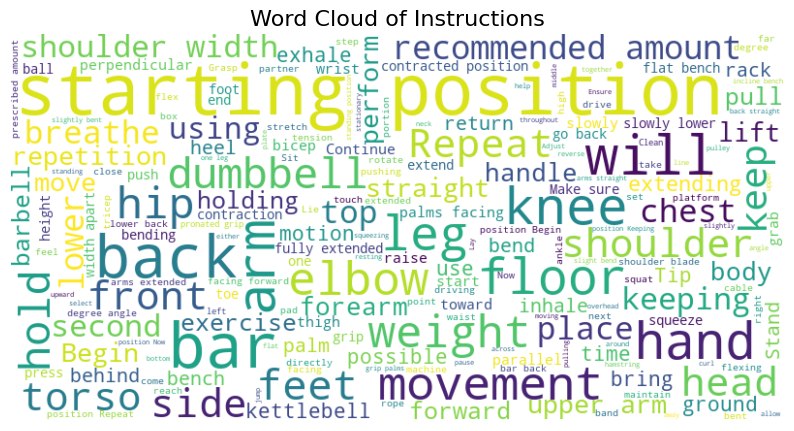

In [29]:
# Combine all instructions into one large string for the word cloud
all_instructions = ' '.join(df['instructions'])

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_instructions)

# Step 3: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud of Instructions', fontsize=16)
plt.show()


**Observation**: 
- Words such as "starting", "position", "back", "knee", "floor", "leg", and "hip" are prominently featured in the word cloud. These terms likely reflect key instructions related to exercise setup and execution.
- Other frequent terms include "barbell", "dumbbell", and "movement", indicating common equipment and actions that are commonly used in the exercises.

**Insights**:
- The dominance of terms like "starting",  "position" and body part references shows that the instructions presented in the dataset emphasize proper setup and initial alignment for exercises. This clarifies the validity of the dataset in making accurate instructions, especially for beginners who require detailed guidance on form and technique.
- The frequent mention of equipment like "bar" and "dumbbell" suggests that the dataset includes a significant number of weight-training exercises. As evident from [a research done by Jackson J. Fye in 2022](https://link.springer.com/article/10.1007/s40279-021-01605-8), these exercises allow users to perform daily tasks much easier, which will benefit the target users of the ChatBot.
- The frequency in words that define human body parts highlights that the exercises cover all kinds of muscle groups, ensuring that the chatbot will offer the users a moe well-rounded workout approach.

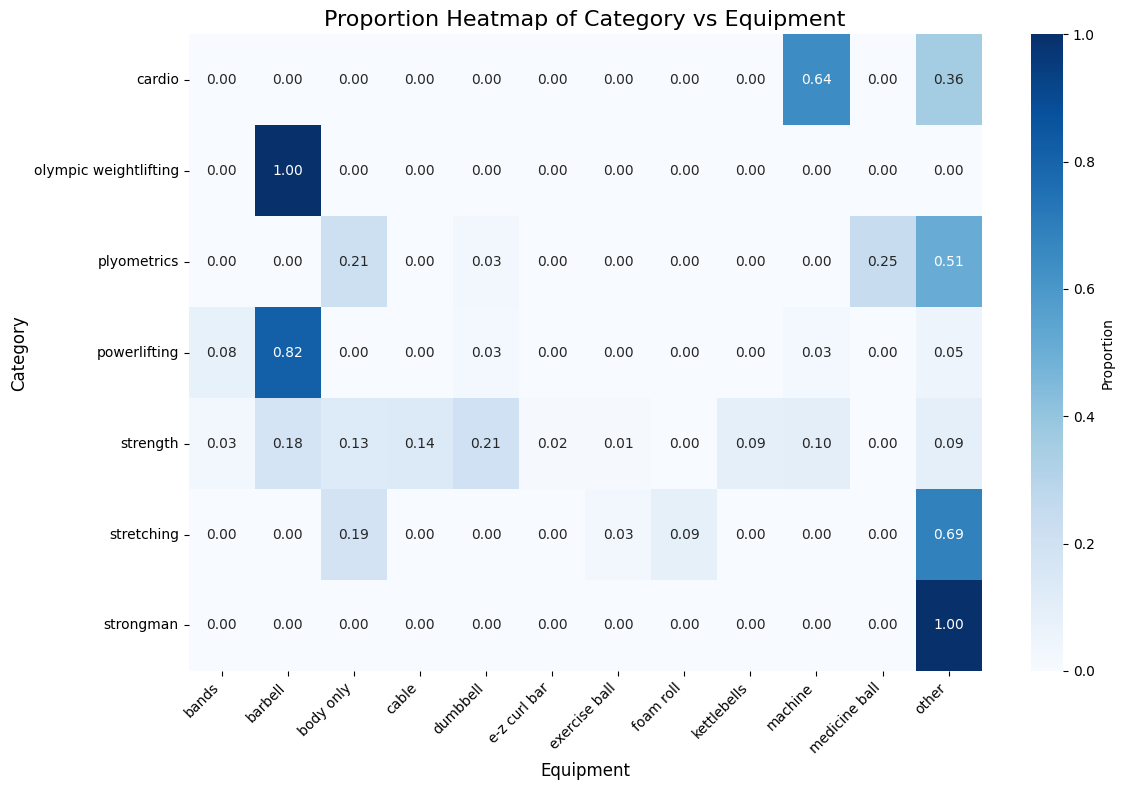

In [37]:
# Step 1: Group by category and equipment, counting occurrences
heatmap_data = df.groupby(['category', 'equipment']).size().unstack(fill_value=0)

# Step 2: Convert counts to ratios
heatmap_data_ratio = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_ratio, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Proportion'})

# Step 4: Add labels and title
plt.title('Proportion Heatmap of Category vs Equipment', fontsize=16)
plt.xlabel('Equipment', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

**Observation**:
- Cardio exercises predominantly use machine (64%) and other equipment (36%), which indicates that the cardio exercises suggested in this dataset make use of several equipments.
- Olympic weightlifting exclusively relies on barbells and no other equipment, which aligns with the nature of Olympic weightlifting focusing on compound barbell movements.
- Plyometrics exercises commonly uses a combination of either body only (21%), medicine ball (25%), and other types of equipment not mentioned (51%).
- Powerlifting dominantly uses barbells (82%) as expected, given the emphasis on compound exercises like squat, bench press, and deadlift.
- Strength training, unlike any other categories in this dataset, utilizies almost every single equipment in the dataset, indicating its variety in equipment usage.
- Stretching primarily relies on other types of equipment (61%) and body only (19%).
- Exclusively relies on "other" equipment (100%), likely due to the specialized nature of strongman training using stones or yokes or any kind of heavy object.

**Insights**: 
- The heatmap highlights clear trends in equipment usage for different exercise categories. For example, cardio and stretching focus on minimal or no equipment, while Olympic weightlifting and powerlifting rely heavily on barbells.
- This dataset has a lot of category of exercises that are niche, hence the frequent use of "other" equipments.
- For future recommendation of this dataset, the data "other" can be further specified since this dataset incorporates a lot of equipment that do not belong in any other equipment categories.